### import python pibraries

In [1]:
# Dataframes
import pandas as pd
import numpy as np

# Visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import svm
from sklearn import metrics

### data loading

In [2]:
#loading of the datasets
df = pd.read_csv('clinicData.csv')
# drop unnamed column from the clinical dataset.
df.dropna(how='all', axis='columns', inplace=True)

### data cleaning

#### strip non-nmeric characters

In [3]:
df.replace('<', '', regex=True, inplace=True)
df.replace('mm', '', regex=True, inplace=True)
df.replace('>', '', regex=True, inplace=True)
df.replace('~','.', regex=True, inplace=True)
df.replace('-','.', regex=True, inplace=True)
df.replace('-','.', regex=True, inplace=True)
df.replace('-','.', regex=True, inplace=True)

#### check columns with missing values

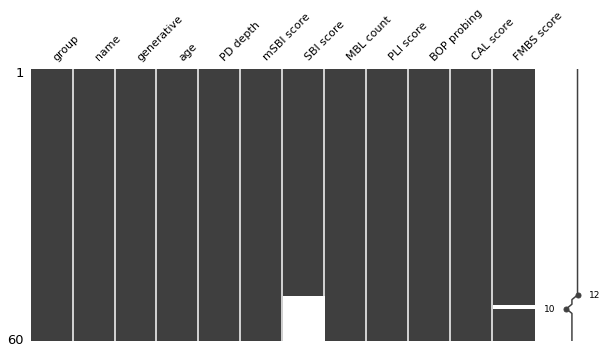

In [4]:
df.isna().sum()
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11)

# Show the figure
plt.show()

Column SBI score has the highest values of null values.
there are a total 10 missing values.

In [5]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value
unknown = df[df['SBI score'].isnull()]

# Print only the colums we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown[["group","BOP probing", "age","PD depth"]][:20]

,group,BOP probing,age,PD depth
50,peri.implantitis,+,44,3.4
51,peri.implantitis,+,49,4.5
52,peri.implantitis,+,55,4
53,peri.implantitis,+,59,3.5
54,peri.implantitis,+,41,4
55,peri.implantitis,+,38,4.5
56,peri.implantitis,+,35,4.5
57,peri.implantitis,+,39,3.5
58,peri.implantitis,+,40,3.5
59,peri.implantitis,+,38,4


##### handling missing values

In [6]:
df['SBI score'].fillna(0,inplace=True)
df['FMBS score'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   group        60 non-null     object 
 1   name         60 non-null     object 
 2   generative   60 non-null     object 
 3   age          60 non-null     int64  
 4   PD depth     60 non-null     object 
 5   mSBI score   60 non-null     int64  
 6   SBI score    60 non-null     float64
 7   MBL count    60 non-null     object 
 8   PLI score    60 non-null     int64  
 9   BOP probing  60 non-null     object 
 10  CAL score    60 non-null     object 
 11  FMBS score   60 non-null     object 
dtypes: float64(1), int64(3), object(8)
memory usage: 5.8+ KB


####  data manipulation

###### target column
     0 --> negative(healthy)
     1 --> positive (not-healthy)

In [7]:
df.loc[df['BOP probing'] == '.', 'BOP probing'] = 0
df.loc[df['BOP probing'] == '+', 'BOP probing'] = 1

As part of the data cleaning process, we have to convert text data to numerical because computations are best suited for numerical inputs.

In [8]:
cols_to_convert = ['PD depth','MBL count','CAL score','FMBS score',]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce', axis=1)
df[cols_to_convert].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PD depth    60 non-null     float64
 1   MBL count   60 non-null     float64
 2   CAL score   60 non-null     float64
 3   FMBS score  60 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


### descriptive statistics and data distribution

In [9]:
# Return list of numerical columns that are not necessarily continuous to find any outliers.
num_cols = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'BOP probing']
df.describe()

,age,PD depth,mSBI score,SBI score,MBL count,PLI score,CAL score,FMBS score
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,36.366667,1.966667,0.883333,0.866667,1.708333,0.683333,2.100000,1.100000
std,11.244534,1.261243,1.075011,1.383519,1.667769,0.833446,1.755379,0.439568
min,21.000000,1.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000
25%,29.000000,1.000000,0.000000,0.000000,0.500000,0.000000,1.000000,1.000000
50%,35.000000,1.000000,0.500000,0.000000,0.600000,0.000000,1.000000,1.000000
75%,39.250000,2.875000,1.250000,2.000000,2.650000,1.000000,2.500000,1.000000
max,73.000000,4.500000,3.000000,4.000000,5.000000,2.000000,6.000000,2.000000


### visualisation

#### age distribution across the dataset

In [10]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    plt.show()

Minimum:21.00
Mean:36.37
Median:35.00
Mode:35.00
Maximum:73.00



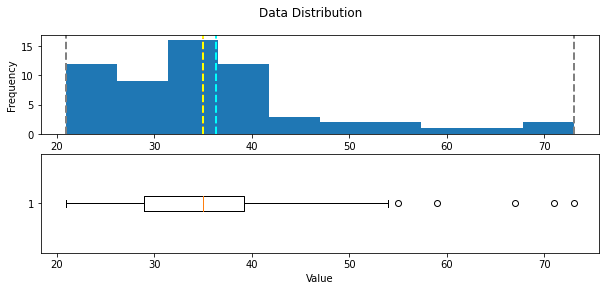

In [11]:
# Get the variable to examine
col = df['age']
# Call the function
show_distribution(col)

#### distribution for the independent variables

In [12]:
independent_var = ['generative',
 'age',
 'PD depth',
 'mSBI score',
 'SBI score',
 'MBL count',
 'PLI score',
 'BOP probing',
 'CAL score',
 'FMBS score']

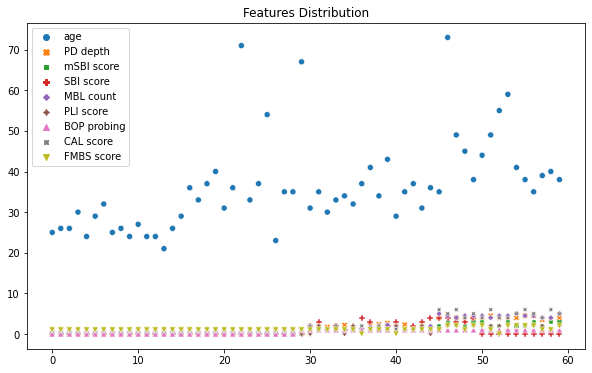

In [13]:
# Create a Figure
fig = plt.figure(figsize=(10,6))

# Create a scatter plot
sns.scatterplot(df[independent_var])

# Customize the chart
plt.title('Features Distribution')

# Show the figure
plt.show()

#### Probability density function

In [14]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

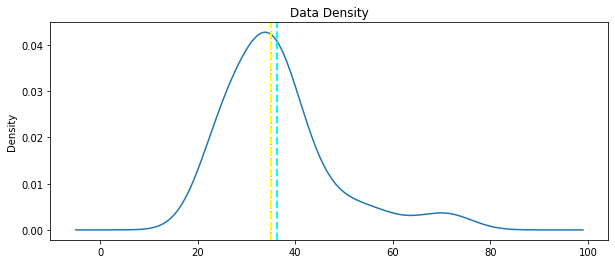

In [15]:
# Get the density of Grade
col = df['age']
show_density(col)

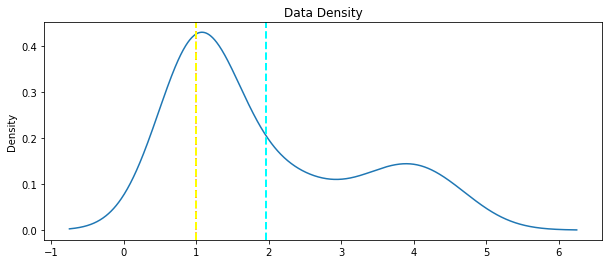

In [16]:
# Get the density of Grade
col = df['PD depth']
show_density(col)

### Support Vector Machine Algorithm
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane.<a> https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

#### prepare data for machine learning

In [17]:
# Drop irelevant colum
final_df = df.drop(labels=["name","group"],axis=1)

# Convert target column to numeric
final_df["BOP probing"] = pd.to_numeric(final_df["BOP probing"], errors = 'raise')

#### one-hot encoding

In [18]:
# Use Pandas to One-Hot encode the generative category
final_df = pd.get_dummies(final_df, columns=["generative"], drop_first=False)

#### extracting independent and dependent variable  


In [19]:
x = final_df.drop(labels=["BOP probing"], axis=1)
y = final_df["BOP probing"]

# algo 1

##### splitting the dataset into training and test set.

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4, random_state=209) 

In [21]:
x_test

,age,PD depth,mSBI score,SBI score,MBL count,PLI score,CAL score,FMBS score,generative_female,generative_male
57,39,3.5,2,0.0,4.0,2,4.0,1.0,0,1
21,36,1.0,0,0.0,0.5,0,1.0,1.0,1,0
25,54,1.0,0,0.0,0.5,0,1.0,1.0,1,0
46,73,4.5,3,4.0,4.5,2,5.0,2.0,1,0
2,26,1.0,0,0.0,0.5,0,1.0,1.0,1,0
0,25,1.0,0,0.0,0.5,0,1.0,1.0,0,1
24,37,1.0,0,0.0,0.5,0,1.0,1.0,1,0
53,59,3.5,3,0.0,4.5,1,4.0,2.0,0,1
27,35,1.0,0,0.0,0.5,0,1.0,1.0,1,0
10,27,1.0,0,0.0,0.5,0,1.0,1.0,1,0


#### model alogorithim

In [22]:
# Generating the model
cls = svm.SVC(kernel="linear")

# Train the model
cls.fit(x_train,y_train)

#Predict the response
pred = cls.predict(x_test)

#### Model evaluation

In [23]:
# Accuracy score
print("accuracy:",metrics.accuracy_score(y_test,y_pred=pred))

# Precison score
print("precision:",metrics.precision_score(y_test,y_pred=pred))

# Recall score
print("recall:",metrics.recall_score(y_test,y_pred=pred))

# Classification report
print(metrics.classification_report(y_test,y_pred=pred))


accuracy: 1.0
precision: 1.0
recall: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



# algo 2

In [24]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

#### feature Scaling 

In [25]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)       

#### fitting the SVM classifier to the training set
Now the training set will be fitted to the SVM classifier. To create the SVM classifier, we will import SVC class from Sklearn.svm library.

In [26]:
# Support vector classifier
from sklearn.svm import SVC 

classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

* The model performance can be altered by changing the value of C(Regularization factor), gamma, and kernel

#### Predicting the test set result 

In [27]:
y_pred= classifier.predict(x_test)  

compare the result of **y_pred** and **y_test** to check the difference between the actual value and predicted value.

In [28]:
y_test == y_pred

26     True
35     True
59     True
28     True
11     True
2      True
34     True
58     True
40     True
22    False
4      True
10     True
30     True
41     True
33     True
Name: BOP probing, dtype: bool

#### Creating the confusion matrix:
compare the performance of the SVM classifier to the Logistic regression classifier. To create the confusion matrix, we need to **import** the **confusion_matrix** function of the sklearn library.The function takes two parameters, mainly y_true( the actual values) and y_pred (the targeted value return by the classifier). THis is shown below


In [29]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  

cm= confusion_matrix(y_test, y_pred)  
pd.DataFrame(cm)

,0,1
0,6,1
1,0,8
